# QC

In [10]:
import bids
from os.path import basename
from bids import BIDSLayout
import matplotlib.pyplot as plt
from nilearn import plotting

In [11]:
layout = BIDSLayout("/Users/leonmartin_bih/work_data/Datasets/NMDARE_controls/nmdare_controls", derivatives=True)

In [12]:
layout.derivatives['HCP Minimal Preprocessing Pipelines'].get_subjects()

['LE0261']

## PreFreesurfer
### ACPC alignment and FNIRT-based masking

In [13]:
acpc_files = layout.derivatives['HCP Minimal Preprocessing Pipelines'].get(suffix='acpc', extension='nii.gz', return_type='file')

acpc_mask_files = layout.derivatives['HCP Minimal Preprocessing Pipelines'].get(suffix='mask', extension='nii.gz', return_type='file')

In [14]:
files = acpc_mask_files

def lookup_files(files, string):
    new_list = list()
    for f in files:
        if string in f:
            new_list.append(f)
    return new_list


/Users/leonmartin_bih/opt/anaconda3/lib/python3.9/site-packages/nilearn/plotting/img_plotting.py:572: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  img = new_img_like(roi_img, data, affine=roi_img.affine)


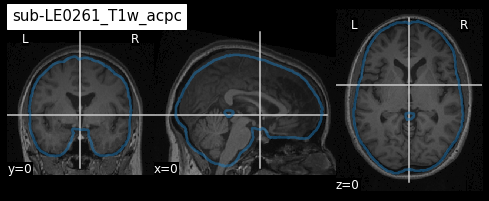

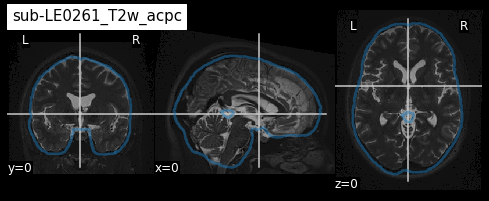

In [15]:
for mod in ['T1w_acpc', 'T2w_acpc']:
    mask = lookup_files(acpc_mask_files, mod)[0]
    bg_img = lookup_files(acpc_files, mod)[0]

    plotting.plot_roi(mask, bg_img=bg_img, alpha=0.5, cut_coords=(0,0,0), title=basename(bg_img).replace('.nii.gz', ''),  view_type='contours', cmap='tab10');

## Distortion Correction, Bias-Field correction and improved registration

In [16]:
nii_files = layout.derivatives['HCP Minimal Preprocessing Pipelines'].get(extension='nii.gz', return_type='file')

In [25]:
restore = lookup_files(nii_files, 'restore.nii.gz')
restore_mni = lookup_files(restore, 'MNI')
restore_acpc_dc = lookup_files(restore, 'acpc_dc')

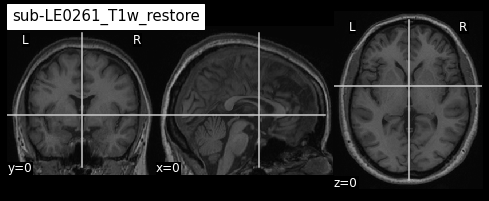

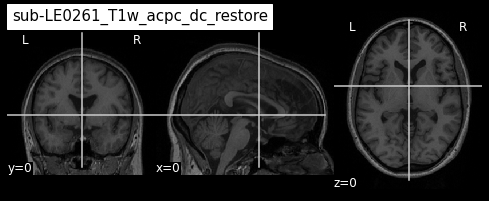

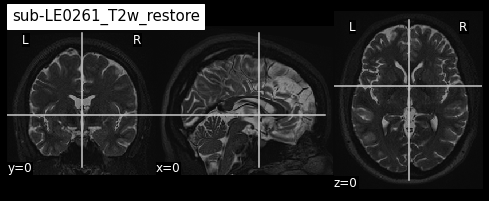

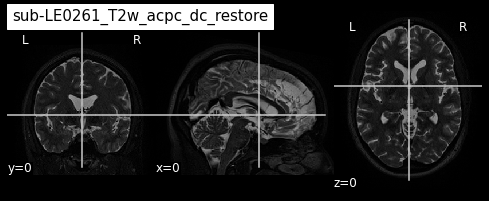

In [26]:
for mod in ['T1w', 'T2w']:
    img = lookup_files(restore_mni, mod)[0]
    plotting.plot_anat(img , cut_coords=(0,0,0), title=basename(img).replace('.nii.gz', ''));
    img = lookup_files(restore_acpc_dc, mod)[0]
    plotting.plot_anat(img , cut_coords=(0,0,0), title=basename(img).replace('.nii.gz', ''));

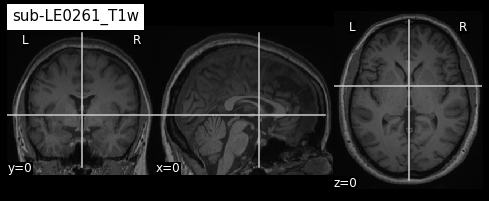

In [27]:
img = "/Users/leonmartin_bih/work_data/Datasets/NMDARE_controls/nmdare_controls/derivatives/hcp-pipelines/sub-LE0261/MNINonLinear/sub-LE0261_T1w.nii.gz"
plotting.plot_anat(img , cut_coords=(0,0,0), title=basename(img).replace('.nii.gz', ''))

## Functional Pipeline
### GenericfMRIVolumeProcessing
#### Motion Correction
The motion parameters are output in a twelve column text file with the following format: <x translation in mm> <y translation in mm> <z translation in mm> <x rotation in degrees> <y rotation in degrees> <z rotation in degrees> <derivative of×translation> <derivative of y translation> <derivative of z translation> <derivative of×rotation> <derivative of y rotation> <derivative of z rotation>. A demeaned and linearly detrended motion parameter file is provided as well for nuisance regression.

In [41]:
mov_reg_labels = ["x translation in mm", "y translation in mm", "z translation in mm", "x rotation in degrees", "y rotation in degrees", "z rotation in degrees", "derivative of×translation", "derivative of y translation", "derivative of z translation", "derivative of×rotation", "derivative of y rotation", "derivative of z rotation"]

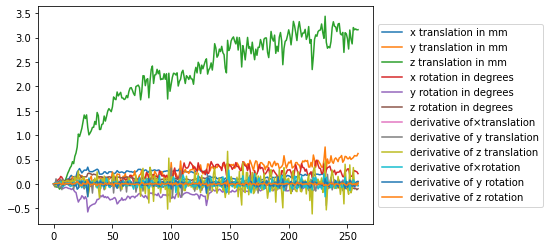

In [52]:
import numpy as np
mov_reg = np.loadtxt("/Users/leonmartin_bih/work_data/Datasets/NMDARE_controls/nmdare_controls/LE0261/sub-LE0261_task-rest/Movement_Regressors.txt")
fig, axs = plt.subplots()
i=0
import pandas as pd
plt.plot(pd.DataFrame(mov_reg, columns=mov_reg_labels), label=mov_reg_labels)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));


In [45]:
mov_reg.shape

(260, 12)

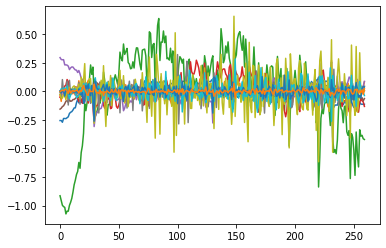

In [58]:
mov_reg_dt = np.loadtxt("/Users/leonmartin_bih/work_data/Datasets/NMDARE_controls/nmdare_controls/LE0261/sub-LE0261_task-rest/Movement_Regressors_dt.txt")
plt.plot(mov_reg_dt);

In [57]:
mov_reg_dt[:, :6] == mov_reg[:, :6]

array([[False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       ...,
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False]])